# Analysis of Opinions on Same-Sex Relations

Ariana Olson, Emma Price

In an effort to understand public opinion on same-sex relations, we used the GSS variable `homosex`. The survey question specifically asks "What about sexual relations between two adults of the same sex--do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?" Though this question refers only to sexual relations -- not relationships or marriage, which are not a more common question within social science. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

### Read in the GSS variables.

In [2]:
path = 'gss.hdf5'
gss = pd.read_hdf(path, key='gss')
gss = gss[gss['year'] >= 1987]
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,natrace,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,year
20056,NaN,3.0,NaN,NaN,4.0,2.0,2.0,4.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1987
20057,NaN,2.0,NaN,NaN,2.0,1.0,2.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1987
20058,NaN,3.0,NaN,NaN,4.0,2.0,1.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1987
20059,NaN,3.0,NaN,NaN,3.0,1.0,2.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1987
20060,NaN,3.0,NaN,NaN,4.0,2.0,2.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1987


In [3]:
def make_plots(percentages,
               index,
               xlabel='Year',
               ylabel='Percent',
               titles=['Always Wrong', 'Never Wrong']):
    """
    percentages: dataframe containing percent who approve or 
                    disapprove of same-sex relations based on
                    different demographic information
    index: number of columns in dataframe to pull from
    xlabel: x-axis label
    ylabel: y-axis label
    title: graph title
    
    creates an approve plot and a disapprove plot based on
    demographic information, put labels outside of the graph
    """
    
    assert len(titles) == 2
    
    ax = plt.subplot(111)
    for column in percentages.columns[1:index]:
        ax.plot(percentages['year'],
                percentages[column],
                label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
        
    ax = plt.subplot(111)
    for column in percentages.columns[index:]:
        ax.plot(percentages['year'],
                percentages[column],
                label=" ".join(column.split()[:-1]))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(titles[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [4]:
def apc_analysis(x_vars, groupby_var, columns, index, buckets):
    percentages = pd.DataFrame([], columns=columns)
    
    averages = [None]*(index*2-1)

    for x_var, group in x_vars:
        averages[0] = x_var
        for x in range(index-1):
            sub_group = group[(group[groupby_var] >= buckets[x]) & (group[groupby_var] < buckets[x+1])]
            averages[x+1] = (sub_group['homosex'].dropna() == 1).mean()
            averages[x+index] = (sub_group['homosex'].dropna() == 4).mean()
        row = pd.DataFrame([averages], columns=columns)
        percentages = percentages.append(row, ignore_index=True)
        averages = [None]*(index*2-1)
    return percentages

## Age-Period-Cohort Analysis

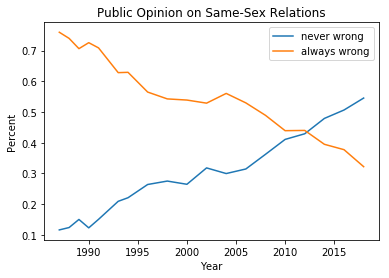

In [5]:
grouped_year = gss.groupby('year')
columns = ['year', 'never wrong', 'always wrong']
percentages = pd.DataFrame([], columns=columns)
for year, group in grouped_year:
    never_wrong = (group['homosex'].dropna() == 4).mean()
    always_wrong = (group['homosex'].dropna() == 1).mean()
    row = pd.DataFrame([[year, never_wrong, always_wrong]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)
plt.plot(percentages['year'], percentages['never wrong'])
plt.plot(percentages['year'], percentages['always wrong'])
plt.title('Public Opinion on Same-Sex Relations')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()

Public opinion on same-sex relations has changed quite rapidly relative to other national opinion (show in the graph above). To analyze how the trend has happened, we performed an age-period-cohort analysis of the GSS `homosex` variable.

### Grouped by year of birth (`cohort`), plotted by year of survey

Grouping by the year a respondent was born, or `cohort`, and plotting the average approval and disapproval rate for each birth year against the year of the survey gives us insight into generational changes. There is a noticable shift in generations over time, which indicates that peoples minds are changing overtime, regardless of when they were born (though younger generations cahnge more rapidly).

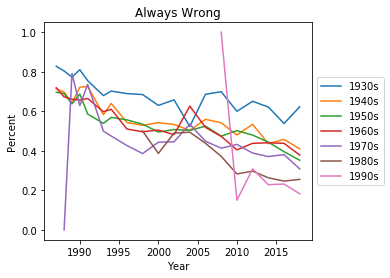

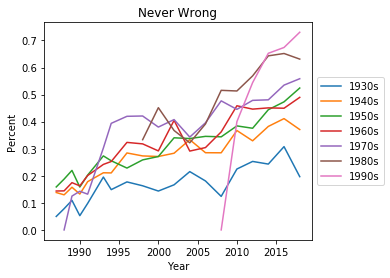

In [6]:
grouped_year = gss.groupby('year')

columns = ['year',
           '1930s always',
           '1940s always',
           '1950s always',
           '1960s always',
           '1970s always',
           '1980s always',
           '1990s always',
           '1930s never',
           '1940s never',
           '1950s never',
           '1960s never',
           '1970s never',
           '1980s never',
           '1990s never']

percentages = apc_analysis(grouped_year, 'cohort', columns, 8, [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])

make_plots(percentages, 8, xlabel="Year")

### Grouped by age during survey, plotted by survey year

Looking at age groups and their average opinion on same-sex relations in each year shows how the opinion of different age groups has changed over time. This can show us the effect that age group has on opinion.

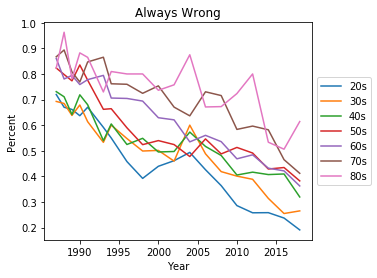

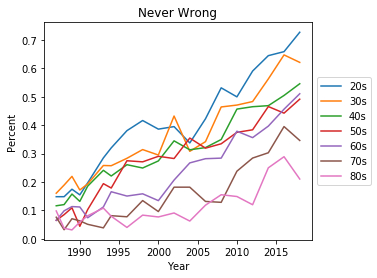

In [7]:
grouped_year = gss.groupby('year')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = apc_analysis(grouped_year, 'age', columns, 8, [20, 30, 40, 50, 60, 70, 80, 89])
make_plots(percentages, 8)

### Grouped by year of birth (`cohort`), plotted by age during survey

Looking at each cohort group's opinion by the age that they were when they took the survey can show us how much your birth year matters across different ages. Or, how peoples minds' change over their time depending on which devade they were born in.

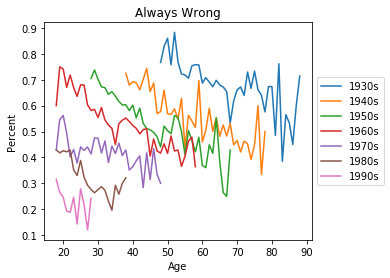

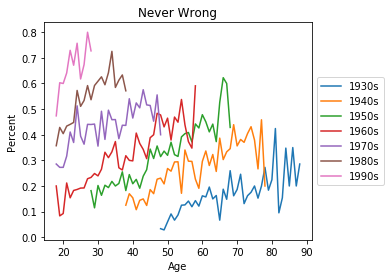

In [8]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1930s always',
           '1940s always',
           '1950s always',
           '1960s always',
           '1970s always',
           '1980s always',
           '1990s always',
           '1930s never',
           '1940s never',
           '1950s never',
           '1960s never',
           '1970s never',
           '1980s never',
           '1990s never']

percentages = apc_analysis(grouped_age, 'cohort', columns, 8, [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
make_plots(percentages, 8, xlabel="Age")

### Grouped by survey year, plotted by age during survey

Looking at the opinion of grouped survey years (approximately every 7 years) compared to their age when they took the survey allows us to see how much, within each survey grouping, opinion varies by age.

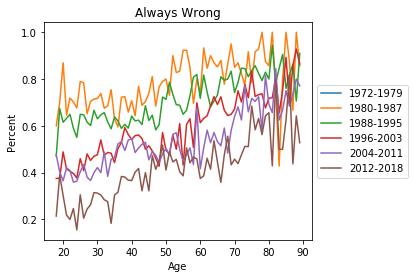

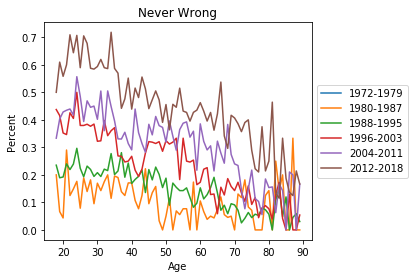

In [9]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = apc_analysis(grouped_age, 'year', columns, 7, [1972, 1980, 1988, 1996, 2004, 2012, 2018])

make_plots(percentages, 7, xlabel="Age")

### Grouped by survey year, plotted by year of birth (`cohort`)

Grouping by the year the survey was taken and plotting the average approval and disapproval rate for each survey year against the year the respondent was born gives us how much the year that a respondent was born and when effects their opinion compared to when they took the survey. There is a definite different in opinion between each survey year grouping, with a strong downward trend by cohort.

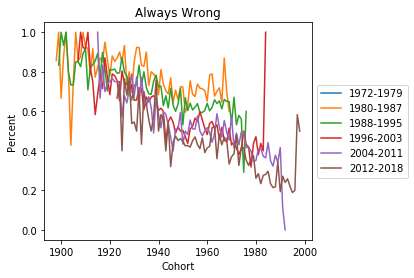

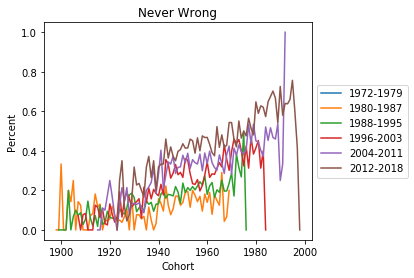

In [10]:
grouped_cohort = gss.groupby('cohort')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = apc_analysis(grouped_cohort, 'year', columns, 7, [1972, 1980, 1988, 1996, 2004, 2012, 2018])

make_plots(percentages, 7, xlabel="Cohort")

### Grouped by age during survey, plotted by year of birth (`cohort`)

Grouping by age and plotting against cohort allows us to see look at respondents who took the survey around the same age, but who were born during different years. So mapping how the opinion of people in their 20s changed if they were born in 1920 or if they were born in 1980. This graph shows a fairly quick change across all age groups. This indicates that the year that you were born matters a lot more than how old you are when you are surveyed. There is still a slight difference between different age groups, but not as significant as how much each age group changes by year surveyed. 

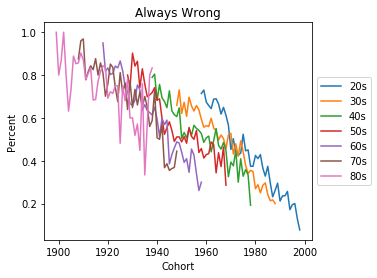

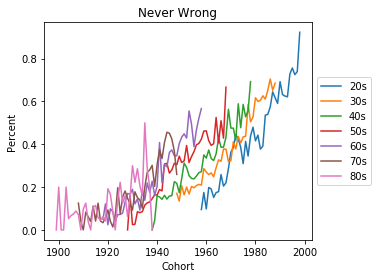

In [11]:
grouped_cohort = gss.groupby('cohort')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = apc_analysis(grouped_cohort, 'age', columns, 8, [20, 30, 40, 50, 60, 70, 80, 89])

make_plots(percentages, 8, xlabel="Cohort")

## Demographic Changes

### Sex

Using the `sex` variable which refers to the respondent's sex we compared survey year and cohort opinion between male and female respondents.

In [12]:
def demo_analysis(x_vars, groupby_var, columns, index):
    percentages = pd.DataFrame([], columns=columns)
    
    averages = [None]*(index*2-1)
    
    for x_var, group in x_vars:
        averages[0] = x_var
        demo_grouped = group.groupby(groupby_var)
        keys = list(demo_grouped.groups.keys())
        if (len(keys) >= index-1):
            for x in range(index-1):
                sub_group = demo_grouped.get_group(x+1)['homosex'].dropna()
                averages[x+1] = (sub_group == 1).mean()
                averages[x+index] = (sub_group == 4).mean()
        row = pd.DataFrame([averages], columns=columns)
        percentages = percentages.append(row, ignore_index=True)
        averages = [None]*(index*2-1)
    return percentages

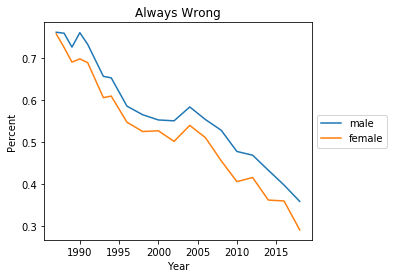

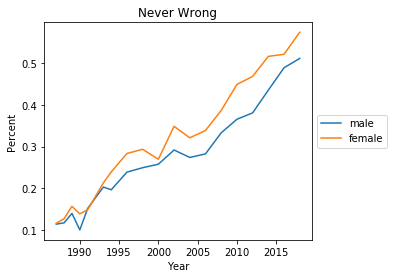

In [13]:
grouped_year = gss.groupby('year')
columns = ['year', 'male always', 'female always', 'male never', 'female never']
percentages = demo_analysis(grouped_year, 'sex', columns, 3)
make_plots(percentages, 3)

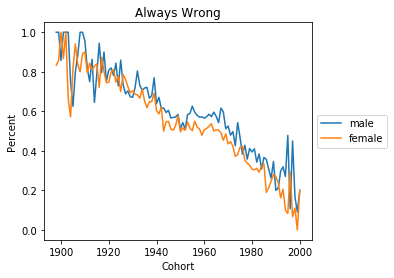

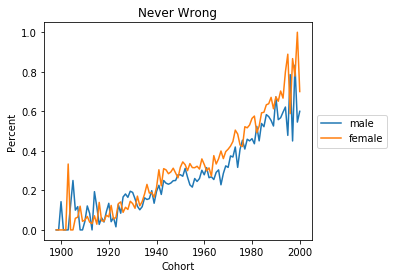

In [14]:
grouped_cohort = gss.groupby('cohort')
columns = ['year', 'male always', 'female always', 'male never', 'female never']
percentages = demo_analysis(grouped_cohort, 'sex', columns, 3)
make_plots(percentages, 3, xlabel="Cohort")

In our cohort analysis, we can see that men and women have a very similar opinion on same-sex relations, until around 1950 when there is a split in the date. Given that the average survey respondent is 45, it makes sense that the period analysis shows this split in 1995. The period analysis also shows an interesting jump in disapproving opinions around 2004, which might be due to the more conservative congress or in reaction to the small jump in approving opinions that preceded it.

### Income

Using the `real` variable which refers to the respondents income in 1986 dollors we compared survey year opinion between different income groupings, based on the 1987 tax brackets for single people (post-1986 Tax Reform).

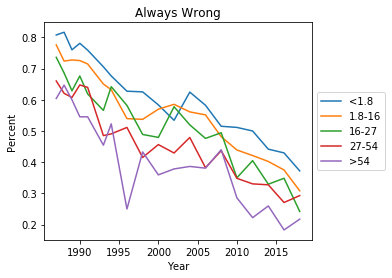

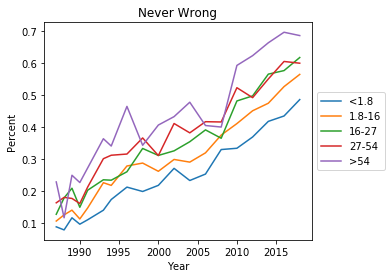

In [15]:
grouped_year = gss.groupby('year')

columns = ['year',
           '<1.8 always',
           '1.8-16 always',
           '16-27 always',
           '27-54 always',
           '>54 always',
           '<1.8 never',
           '1.8-16 never',
           '16-27 never',
           '27-54 never',
           '>54 never',]

percentages = apc_analysis(grouped_year, 'realrinc', columns, 6, [0, 1800, 16000, 27000, 54000, gss['realrinc'].max()])
make_plots(percentages, 6)

This period analysis of income indicates that those who earn more are more likely to be more approving of same-sex relations, regardless of time and as time goes on, everyone is more approving.

### Political Affiliation

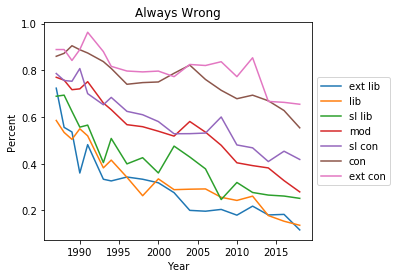

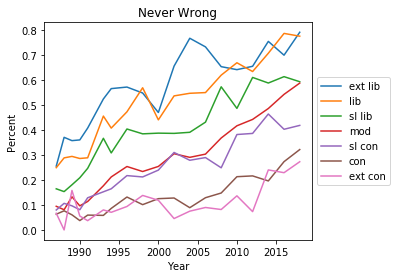

In [18]:
grouped_year = gss.groupby('year')

columns = ['year',
          'ext lib always',
          'lib always',
          'sl lib always',
          'mod always',
          'sl con always',
          'con always',
          'ext con always',
          'ext lib never',
          'lib never',
          'sl lib never',
          'mod never',
          'sl con never',
          'con never',
          'ext con never']

percentages = demo_analysis(grouped_year, 'polviews', columns, 8)
make_plots(percentages, 8)

This analysis shows, as expected, more liberal people are more likely to approve of same-sex relations that more conservative people. Interestingly, compared to other demographic variables, the rate of change between different groups is less extreme over time.

### Religion

To understand the impact of religious affliation, we looked into the `relig` variable which is the respondents answer to the questions "What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?"

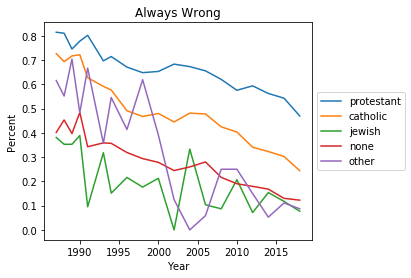

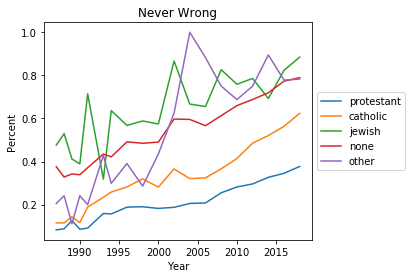

In [19]:
grouped_year = gss.groupby('year')

# Only the first 5 categories have consistent numbers of respondants.
columns = ['year',
          'protestant always',
          'catholic always',
          'jewish always',
          'none always',
          'other always',
          'protestant never',
          'catholic never',
          'jewish never',
          'none never',
          'other never'
          ]
percentages = demo_analysis(grouped_year, 'relig', columns, 6)
make_plots(percentages, 6)

This analysis shows that each religion is fairly distinct in how they feel about same-sex relations which makes sense given most religions strong view on same-sex relations. There are very few `other` and `jewish` respondents, so those averages are less smooth.

### Fundamentalism

The `fund` variable asks the "Fundamentalism/Liberalism of Respondent's Religion" and splits between fundamentalist, moderate, and liberal.

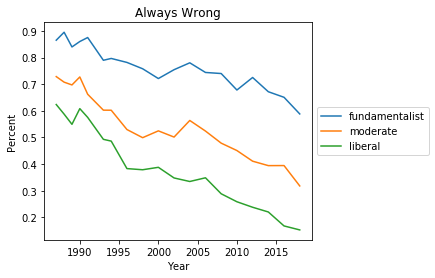

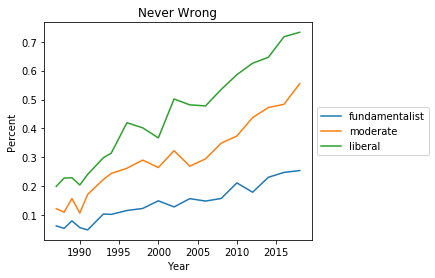

In [20]:
grouped_year = gss.groupby('year')

columns = ['year',
          'fundamentalist always',
          'moderate always',
          'liberal always',
          'fundamentalist never',
          'moderate never',
          'liberal never']

percentages = demo_analysis(grouped_year, 'fund', columns, 4)
make_plots(percentages, 4)

As expected, respondents who are more fundamental are less likely to approve of same-sex relations, though all people are still trending toward more approval.

### Marital Status

Respondents marital status, or `marital` asks about the current marital status of respondents.

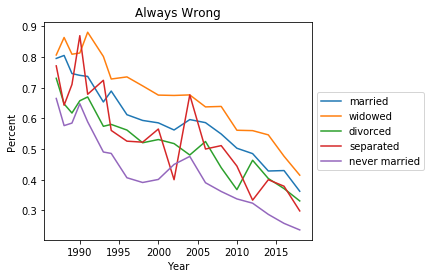

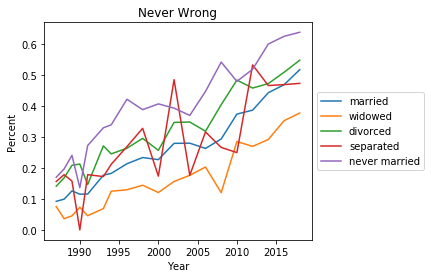

In [21]:
grouped_year = gss.groupby('year')

columns = ['year', 
           'married always', 
           'widowed always', 
           'divorced always', 
           'separated always', 
           'never married always',
           'married never', 
           'widowed never', 
           'divorced never', 
           'separated never', 
           'never married never']
percentages = demo_analysis(grouped_year, 'marital', columns, 6)
make_plots(percentages, 6)

There are fairly distinct opinions on same-sex relations based on marital status, with those who have never been married being most approving and those who are widowed least approving. This is likely due to how people who have not been married are usually younger and people who have been widowed are usually older.

### 16 Year Old Residence

The variable `res16` is the type of area where the respondents lived when they were 16 years old, which reflects to the best of our knowledge, the area where they grew up.

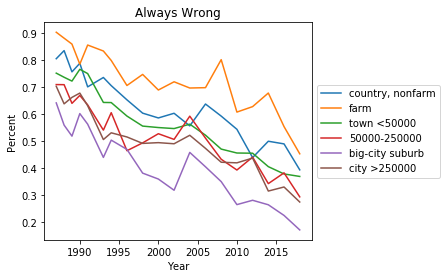

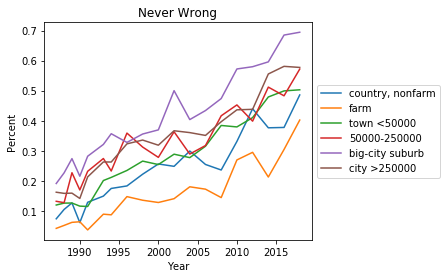

In [22]:
grouped_year = gss.groupby('year')

columns = ['year',
           'country, nonfarm always',
           'farm always',
           'town <50000 always',
           '50000-250000 always',
           'big-city suburb always',
           'city >250000 always',
           'country, nonfarm never',
           'farm never',
           'town <50000 never',
           '50000-250000 never',
           'big-city suburb never',
           'city >250000 never']

percentages = demo_analysis(grouped_year, 'res16', columns, 7)
make_plots(percentages, 7)

These graphs depict that the more urban and less rural of a place that someone grows up, the more approving they are of same-sex relations. This could very well be tied to how traditionally "liberal" cities are and tracitionally "conservative" rural areas are.

### Region of Residence at 16

The variable `reg16` is the location where respondents lived when they were 16 years old, which reflects to the best of our knowledge, the area where they grew up.

In [23]:
def reg16_analysis(x_vars, groupby_var, columns, index):
    percentages = pd.DataFrame([], columns=columns)
    
    averages = [None]*(index*2-1)
    
    for x_var, group in x_vars:
        averages[0] = x_var
        demo_grouped = group.groupby(groupby_var)
        keys = list(demo_grouped.groups.keys())
        if (len(keys) >= index-1):
            for x in range(index-1):
                sub_group = demo_grouped.get_group(x)['homosex'].dropna()
                averages[x+1] = (sub_group == 1).mean()
                averages[x+index] = (sub_group == 4).mean()
        row = pd.DataFrame([averages], columns=columns)
        percentages = percentages.append(row, ignore_index=True)
        averages = [None]*(index*2-1)
    return percentages

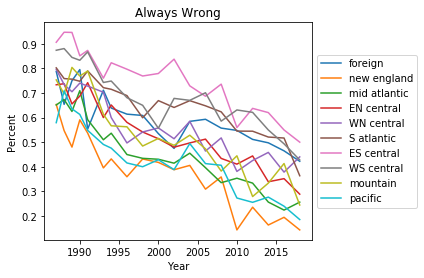

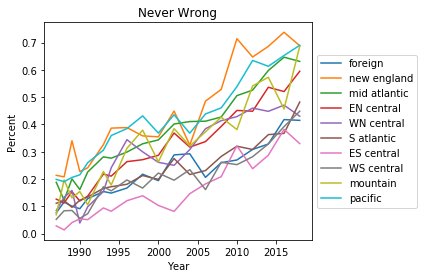

In [24]:
grouped_year = gss.groupby('year')

columns = ['year',
           'foreign always',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'foreign never',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = reg16_analysis(grouped_year, 'reg16', columns, 11)
make_plots(percentages, 11)

This period analysis shows that those from New England, the Pacific, and the Mountain zones are most likely to approve and those from SE Central are least likely to approve, with about a 40 point difference. This makes sense given the volume of cities in the the most approving areas and the amount of religion in the least approving.

### Region of Residence at the time of Survey

The variable `region` is the location where respondents is currently living.

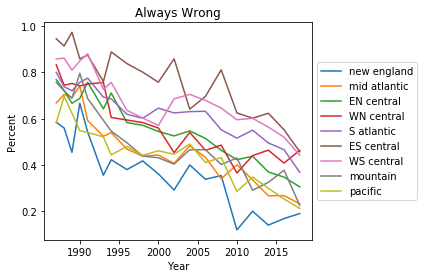

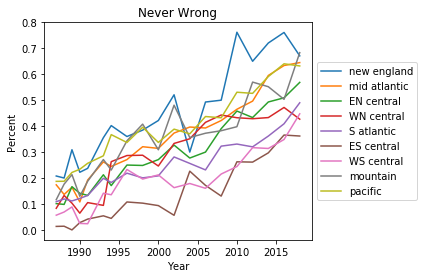

In [25]:
grouped_year = gss.groupby('year')

columns = ['year',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = demo_analysis(grouped_year, 'region', columns, 10)
make_plots(percentages, 10)

This period analysis shows results very similar to the `reg16` analysis, which reflects the likelihood of people to leave the zone in which they grew up.

### Religious Service Attendance

The variable `attend` is the frequency that respondents attend religious services. Although it is just one factor, this variable can be used as a metric for how religious a person is, and from there we can see how that affects the respondent's answers.

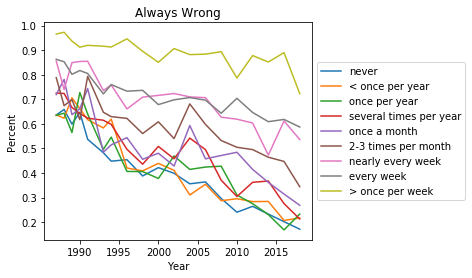

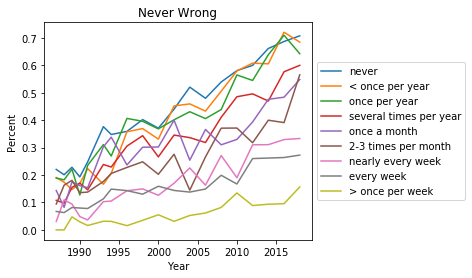

In [26]:
grouped_year = gss.groupby('year')

columns = [
    'year',
    'never always',
    '< once per year always',
    'once per year always',
    'several times per year always',
    'once a month always',
    '2-3 times per month always',
    'nearly every week always',
    'every week always',
    '> once per week always',
    'never never',
    '< once per year never',
    'once per year never',
    'several times per year never',
    'once a month never',
    '2-3 times per month never',
    'nearly every week never',
    'every week never',
    '> once per week never',
]

percentages = reg16_analysis(grouped_year, 'attend', columns, 10)
make_plots(percentages, 10)

The general trend of this data appears to be that higher frequency of attending church is related to being more disapproving of homosexual relationships. Notably, survey respondents who attend religious services more than once a week think homosexual sex is always wrong at least 10 percentage points higher than any other group. The same group also has a much lower proportion of people who think homosexual sex is never wrong, and the proportion who do is growing more slowly with year than the other groups.

## Logistic Regression

### Prepare the data

To better visualize trends we observed in the previous section, we created a logistic regression model of the likelihood that respondents will give an "Always Wrong" response to the questions "What about sexual relations between two adults of the same sex--do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?". 

First, we have to simplify the data so that there are only two possible answers: "Always Wrong" and "Never Wrong". We decided to do this by only using data from respondents who gave one of these two possible answers, instead of binning the more moderate responses into one of the available categories.

In [27]:
log_model = gss

# Change 'Never Wrong' code to 0 for logistic regression.
log_model['homosex'].replace(4, 0, inplace=True)
log_model['homosex'].value_counts()

1.0    14877
0.0     8248
3.0     1701
8.0     1246
2.0     1112
Name: homosex, dtype: int64

Because we decided to not use the more moderate responses of "Almost always wrong", "Sometimes wrong", "Other", and "Don't know", we replace them with NaNs for this analysis.

In [28]:
log_model['homosex'].replace([2, 3, 5, 8], np.nan, inplace=True)
log_model['homosex'].value_counts()

1.0    14877
0.0     8248
Name: homosex, dtype: int64

### Create the model

Because the year the survey was taken and the cohort a respondent belonged to appeared to have a large effect on the opinion of the respondents, we decided to use these as variables in our regression model. In addition, we included `sex`, `reg16`, `relig`, and `attend` as variables to look at in the model in order to see if any of these variables have a large effect on a respondent's answer with everything else held constant. In this model, 0 is the likelihood that a respondent will say that sexual relations between two adults of the same sex is never wrong, while a 1 means the respondent believes it is always wrong. We are using logistic regression because we simplified the question to two potential answers.

In [29]:
results_homosex = smf.logit('homosex ~ year + cohort + C(sex) + C(reg16) + C(relig) + C(attend)', data=log_model).fit()

Optimization terminated successfully.
         Current function value: 0.482423
         Iterations 7


Here are the summarized results of the regression model. The coefficients are best understood through visualization, but the model does give `year` and `cohort` negative values, which means that people should be less likely to say that homosexual relationships are wrong as these variables increase, which is what we expect.

In [30]:
results_homosex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                homosex   No. Observations:                22819
Model:                          Logit   Df Residuals:                    22785
Method:                           MLE   Df Model:                           33
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:                  0.2603
Time:                        17:47:30   Log-Likelihood:                -11008.
converged:                       True   LL-Null:                       -14883.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          157.2873      3.667     42.898      0.000     150.101     164.474
C(sex)[T.2]         -0.5997      0.034    -17.459      0.000      -0.667      -0.532
C(reg16)[T.1]       -1.4834      0.099    -15.007      0.000      -1.677      -1.290
C(reg16)[T.2]       -1.0783      0.077    -13.938      0.000      -1.230      -0.927
C(reg16)[T.3]       -0.7894      0.075    -10.502      0.000      -0.937      -0.642
C(reg16)[T.4]       -0.8301      0.089     -9.362      0.000      -1.004      -0.656
C(reg16)[T.5]       -0.3733      0.079     -4.701      0.000      -0.529      -0.218
C(reg16)[T.6]        0.1071      0.100      1.075      0.282      -0.088       0.302
C(reg16)[T.7]       -0.1664      0.088     -1.884      0.060      -0.339       0.007
C(reg16)[T.8]       -0.6933      0.097     -7.158      0.000      -0.883      -0.503
C(reg16)[T.9]       -1.0654      0.081    -13.073      0.000      -1.225      -0.906
C(relig)[T.2.0]     -0.5889      0.042    -14.095      0.000      -0.671      -0.507
C(relig)[T.3.0]     -2.2722      0.136    -16.647      0.000      -2.540      -2.005
C(relig)[T.4.0]     -1.2557      0.055    -22.761      0.000      -1.364      -1.148
C(relig)[T.5.0]     -1.2625      0.118    -10.740      0.000      -1.493      -1.032
C(relig)[T.6.0]     -2.1602      0.294     -7.339      0.000      -2.737      -1.583
C(relig)[T.7.0]     -1.2092      0.322     -3.758      0.000      -1.840      -0.579
C(relig)[T.8.0]     -0.7797      0.542     -1.440      0.150      -1.841       0.282
C(relig)[T.9.0]      0.5298      0.305      1.738      0.082      -0.068       1.127
C(relig)[T.10.0]    -0.7162      0.305     -2.348      0.019      -1.314      -0.118
C(relig)[T.11.0]     0.1346      0.121      1.114      0.265      -0.102       0.371
C(relig)[T.12.0]    -0.6862      0.635     -1.081      0.280      -1.930       0.558
C(relig)[T.13.0]    -0.1972      0.298     -0.661      0.509      -0.782       0.388
C(relig)[T.98.0]    -0.4222      0.519     -0.813      0.416      -1.440       0.596
C(attend)[T.1.0]    -0.0503      0.068     -0.739      0.460      -0.184       0.083
C(attend)[T.2.0]    -0.0618      0.057     -1.075      0.282      -0.174       0.051
C(attend)[T.3.0]     0.2289      0.061      3.742      0.000       0.109       0.349
C(attend)[T.4.0]     0.2509      0.072      3.465      0.001       0.109       0.393
C(attend)[T.5.0]     0.5256      0.068      7.703      0.000       0.392       0.659
C(attend)[T.6.0]     1.0742      0.089     12.007      0.000       0.899       1.250
C(attend)[T.7.0]     1.2458      0.060     20.852      0.000       1.129       1.363
C(attend)[T.8.0]     2.4982      0.111     22.531      0.000       2.281       2.716
year                -0.0558      0.002    -29.272      0.000      -0.060      -0.052
cohort              -0.0225      0.001    -21.769      0.000      -0.025      -0.020
====================================================================================
"""

In [31]:
def make_prediction_df_year(cohort=1977, sex=1, reg16=4, relig=1, attend=3):
    df = pd.DataFrame()
    df['year'] = np.linspace(1970, 2030)
    df['cohort'] = cohort
    df['sex'] = sex
    df['reg16'] = reg16
    df['relig'] = relig
    df['attend'] = attend
    
    return df

In [32]:
def make_prediction_df_cohort(sex=1, reg16=4, relig=1, attend=3, year=year):
    df = pd.DataFrame()
    df['cohort'] = np.linspace(year - 80, year-18)
    df['sex'] = sex
    df['reg16'] = reg16
    df['relig'] = relig
    df['attend'] = attend
    df['year'] = year
    
    return df

In [33]:
grouped_year = log_model.groupby('year')
disapprove_homosex_year = grouped_year['homosex'].mean()

In [34]:
grouped_cohort = log_model.groupby('cohort')
disapprove_homosex_cohort = grouped_cohort['homosex'].mean()

In [35]:
def plot_preds_year(scatter_data,
                    plot_by,
                    label_dict,
                    make_df_lambda,
                    figname,
                    title,
                    xlabel,
                    ylabel='Likelihood of answering "Always Wrong"'):
    ax = plt.subplot(111)
    ax.plot(scatter_data, 'o', alpha=0.5)
    for code, label in label_dict.items():
        df = make_df_lambda(code)
        pred = results_homosex.predict(df)
        ax.plot(df[plot_by], pred, label=label, alpha=0.7)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('images/{}.png'.format(figname), bbox_inches='tight')

In [36]:
def plot_preds_cohort(scatter_data,
                    plot_by,
                    label_list,
                    make_df_lambda,
                    figname,
                    title,
                    xlabel,
                    ylabel='Likelihood of answering "Always Wrong"'):
    ax = plt.subplot(111)
    ax.plot(scatter_data, 'o', alpha=0.5)
    for label in label_list:
        df = make_df_lambda(label)
        pred = results_homosex.predict(df)
        ax.plot(df[plot_by], pred, label=str(label), alpha=0.7)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('images/{}.png'.format(figname), bbox_inches='tight')

### Region where respondent lived at 16

The `reg16` variable represents the region the respondents lived in when they were 16. We want to know if the model predicts any notable trends in the answers to `homosex` that people have by year of survey. To do this, we will plot the model's predictions for each possible region versus the survey year while holding other variables constant. The constant values we chose to reflect fairly average responses for each category.

This is analogous to plotting the proportion of people from each region who say that homosexual sexual relationships are always wrong by survey year.

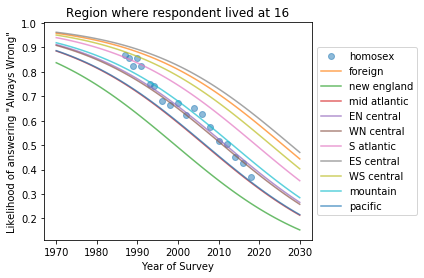

In [37]:
make_df_reg16 = lambda code: make_prediction_df_year(reg16=code)
reg16_labels = {
    0: 'foreign',
    1: 'new england',
    2: 'mid atlantic',
    3: 'EN central',
    4: 'WN central',
    5: 'S atlantic',
    6: 'ES central',
    7: 'WS central',
    8: 'mountain',
    9: 'pacific'
}

plot_preds_year(disapprove_homosex_year,
                'year',
                reg16_labels,
                make_df_reg16,
                'reg16_log',
                title='Region where respondent lived at 16',
                xlabel='Year of Survey')

These curves are consistent with the analogous data plotted in the previous section. Although all of the curves have a negative trend, regions such as New England are consistently more likely to approve of homosexual relationships than people who grew up in ES Central (the South), and it does not appear that the difference in likelihoods among regions for a particular year changes much. The lines appear to diverge because the graph has asymptotes at 1.0 and 0.0, but in the middle. If extrapolated out far enough, the model will predict that people will all approve of homosexual relationships, which is expected given the strength of the year the survey was taken in respondents' answers, but should not be used to draw any conclusions unless more data is given for later years.

### Religion of Respondent

The `relig` variable represents the religion of the respondent. Like in the previous section, we are only looking at the 5 most common reponses to the question because the other answers typically have far fewer to no respondents for a given year. We want to know if there is any religious group that shows a notable pattern over survey years. To do this, we vary religion while keeping the other variables constant and look at the groups over a range of years.

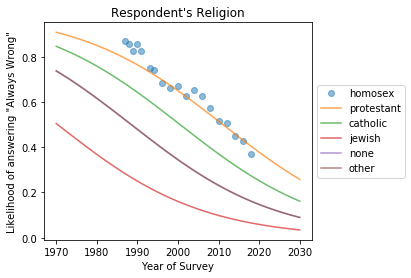

In [38]:
make_df_relig = lambda code: make_prediction_df_year(relig=code)

relig_labels = {
    1: 'protestant',
    2: 'catholic',
    3: 'jewish',
    4: 'none',
    5: 'other'
}

plot_preds_year(disapprove_homosex_year,
                'year',
                relig_labels,
                make_df_relig,
                'relig_log',
                title="Respondent's Religion",
                xlabel='Year of Survey')

Like in the previous section, the plot above shows the expected behavior for each religion. We expected to see Protestants have the highest likelihood of disapproving respondents while Jewish respondents have the lowest likelihood of disapproval. The difference in likelihoods among the groups does not change much per year. Again, because of the effect of the year the survey was taken, all of the groups have a negative trend and will approach 0 if the model is extrapolated out far enough.

### Frequency of attendance at religious services

The `attend` variable represents how often a respondent attends religious services. We are using this variable as one indicator of how religious a person is. We want to see if the model predicts different trends for people based on how religious they are. We do this by looking at the different levels of attendance over survey years with all other variables held constant.

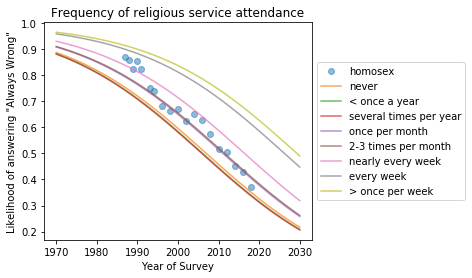

In [39]:
make_df_attend = lambda code: make_prediction_df_year(attend=code)

attend_labels = {
    0: 'never',
    1: '< once a year',
    2: 'several times per year',
    3: 'once per month',
    4: '2-3 times per month',
    5: 'nearly every week',
    6: 'every week',
    7: '> once per week'
}

plot_preds_year(disapprove_homosex_year,
               'year',
               attend_labels,
               make_df_attend,
               'attend_log',
               title="Frequency of religious service attendance",
               xlabel="Year of Survey")

As expected, the more frequently a person attends religious services, the more likely they are to disapprove of homosexual relations. Again, all groups have a negative trend. It is interesting to note that the model predicts the respondents who attend religious services more than once a week (the most religious group by this metric) have a much greater difference in likelihood than the other groups. They are also the group that is slowest to change their opinions, as can be seen by the shape of the curve in relation to the curves of the other groups. Additionally, this group has the greatest difference in likelihood in relation to the next most likely group.

### Year of Survey

Finally, we want to see how the model predicts responses based on the year the survey was taken. Because it was apparent in the previous section that the year the survey was taken strongly influences the proportion of respondents who disapprove of homosexual relationships, we want to see if the model agrees.

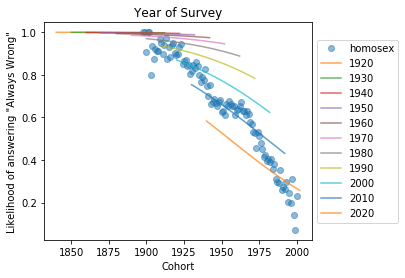

In [40]:
make_df_year = lambda year: make_prediction_df_cohort(year=year)

years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

plot_preds_cohort(disapprove_homosex_cohort,
                 'cohort',
                 years,
                 make_df_year,
                 'year_log',
                 title='Year of Survey',
                 xlabel='Cohort')

As expected, the model predicts that respondents will be less likely to disapprove as the survey year increases. There does not appear to be a significant change in the differences in likelihood as the cohort increases, and all groups have a negative trend. It appears that the rate of the negative trend increases as the year increases.